In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

df_data = pd.read_csv("data.csv")
print(df_data.shape)
df_data.head(5)


(45136, 16)


,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION
0,2008-05-05,58,Manager,Marié,Tertiaire,No,2143,Yes,No,NaN,261,1,-1,0,NaN,No
1,2008-05-05,123,Technicien,NaN,Secondaire,No,29,Yes,NaN,NaN,151,1,-1,0,NaN,No
2,2008-05-05,33,Entrepreuneur,Marié,Secondaire,No,2,Yes,Yes,NaN,76,1,-1,0,NaN,No
3,2008-05-05,47,Col bleu,Marié,NaN,No,1506,Yes,No,NaN,92,1,-1,0,NaN,No
4,2008-05-05,33,NaN,Célibataire,NaN,No,1,No,No,NaN,198,1,-1,0,NaN,No


In [152]:
# situation précaire 
df_data.query('BALANCE > 0 and BALANCE < 50')


0.9162907318741551

In [154]:
def hist_quanti_with_restriction(name_data,name_column,restriction,relation,b=100):

    df = name_data.query('{} {} {}'.format(name_column,relation,restriction))
    mean_col = np.mean(df[name_column])
    print("Mean: {}".format(mean_col))
    median_col = np.median(df[name_column])
    print("Median: {}".format(median_col))
    mode_col = st.mode(df[name_column])
    print("Mode: {}".format(mode_col))
    std_col = np.std(df[name_column])
    print("Std dev: {}".format(std_col))


    plt.figure(figsize = (14, 6))
    plt.title("Valeurs aberrantes")
    plt.xlabel(name_column)

    plt.hist(df[name_column],bins=b)

    plt.axvline(mean_col, color='#FD4E40', linestyle='solid', linewidth=2, label = "Mean")
    plt.axvline(median_col, color='#08ffb9', linestyle='solid', linewidth=2, label = "Median")
    plt.axvline(mode_col, color='#7F5C04', linestyle='solid', linewidth=2, label = "Mode")

    plt.axvline(mean_col + std_col, color='#FFB908', linestyle='solid', linewidth=2, label = "Standard Deviations")
    plt.axvline(mean_col - std_col, color='#FFB908', linestyle='solid', linewidth=2)

    plt.axvline(mean_col + std_col * 2, color='#FFB908', linestyle='solid', linewidth=2)
    plt.axvline(mean_col - std_col * 2, color='#FFB908', linestyle='solid', linewidth=2)

    plt.axvline(mean_col + std_col * 3, color='#FFB908', linestyle='solid', linewidth=2)
    plt.axvline(mean_col - std_col * 3, color='#FFB908', linestyle='solid', linewidth=2)

    #plt.axvline(check_value, color='#62EDBF', linestyle='solid', linewidth=2, label = "You")

    plt.legend()

In [143]:
def treat_BALANCE(name_data):
    add_AT_DEBIT(name_data)
    name_data.BALANCE = name_data.BALANCE.apply(lambda x: np.absolute(x))
    INDEX = list(name_data.query('BALANCE >= 0 and BALANCE < 1').index)
    name_data.BALANCE.loc[INDEX] = 1
    name_data.BALANCE = name_data.BALANCE.apply(lambda x: np.log(x))
    return name_data

In [20]:
# x = pd.crosstab(df_data["RESULT_LAST_CAMPAIGN"],df_data["CONTACT"]).apply(lambda r: round(r/r.sum()*100,2), axis=1)
# print(x)
# print(pd.crosstab(df_data["JOB_TYPE"],df_data["STATUS"],margins=True,margins_name="Total"))

In [17]:
df_data.head(1)

,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION
0,2008-05-05,58,Manager,Marié,Tertiaire,No,2143,Yes,No,NaN,261,1,-1,0,Not contacted,No


No handles with labels found to put in legend.


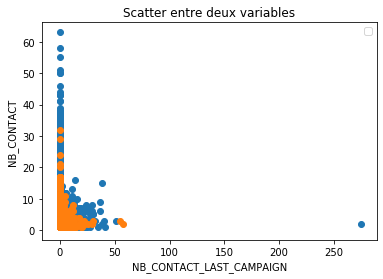

In [136]:
x = "NB_CONTACT_LAST_CAMPAIGN"
y = "NB_CONTACT"

df = df_data[df_data['SUBSCRIPTION'] == 'No']
plt.scatter(df[x],df[y])
plt.title("Scatter entre deux variables")
plt.ylabel(y)
plt.xlabel(x)

df = df_data[df_data['SUBSCRIPTION'] == 'Yes']
plt.scatter(df[x],df[y])
plt.title("Scatter entre deux variables")
plt.ylabel(y)
plt.xlabel(x)
plt.legend()

In [132]:
x = np.abs(df_data['NB_CONTACT_LAST_CAMPAIGN'] - df_data['NB_CONTACT'])

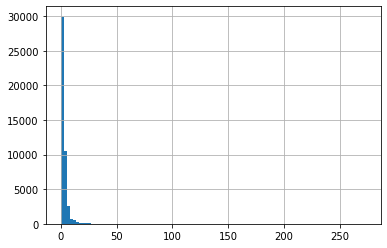

In [133]:
x.hist(bins=100)

In [134]:
df_data['NB_CONTACT_LAST_CAMPAIGN'].describe()

count    45136.000000
mean         0.575173
std          2.296948
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: NB_CONTACT_LAST_CAMPAIGN, dtype: float64

In [92]:
len(df_data['NB_CONTACT_LAST_CAMPAIGN'].value_counts())

41

In [70]:
sorted(df_data['NB_CONTACT_LAST_CAMPAIGN'],reverse=True)

[275,
 58,
 55,
 51,
 41,
 40,
 38,
 38,
 37,
 37,
 35,
 32,
 30,
 30,
 30,
 29,
 29,
 29,
 29,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,

In [81]:
from scipy import stats
df_data['NB_CONTACT_LAST_CAMPAIGN_ranked'] = stats.rankdata(df_data['NB_CONTACT_LAST_CAMPAIGN'], method='dense')
df_data['NB_CONTACT_ranked'] = stats.rankdata(df_data['NB_CONTACT'], method='dense')

In [91]:
df_data['NB_CONTACT_LAST_CAMPAIGN_ranked'].describe()

count    45136.000000
mean         1.568194
std          1.868919
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         41.000000
Name: NB_CONTACT_LAST_CAMPAIGN_ranked, dtype: float64

In [90]:
df_data['NB_CONTACT_LAST_CAMPAIGN'].describe()

count    45136.000000
mean         0.575173
std          2.296948
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: NB_CONTACT_LAST_CAMPAIGN, dtype: float64

Text(0.5, 0, 'NB_CONTACT')

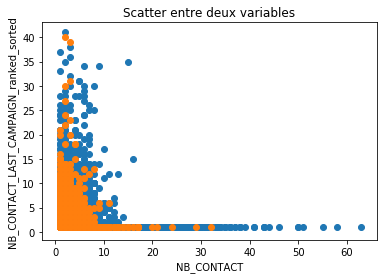

In [80]:
x = "NB_CONTACT"
y = "NB_CONTACT_LAST_CAMPAIGN_ranked_sorted"

df = df_data[df_data['SUBSCRIPTION'] == 'No']
plt.scatter(df[x],df[y])
plt.title("Scatter entre deux variables")
plt.ylabel(y)
plt.xlabel(x)

df1 = df_data[df_data['SUBSCRIPTION'] == 'Yes']
plt.scatter(df1[x],df1[y])
plt.title("Scatter entre deux variables")
plt.ylabel(y)
plt.xlabel(x)

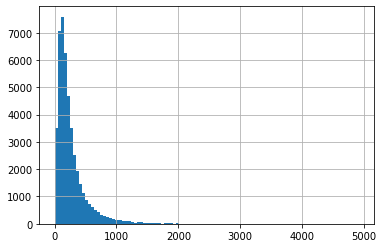

In [15]:
df_data.DURATION_CONTACT.hist(bins=100)

In [16]:
df_data.query('NB_CONTACT >50 and DURATION_CONTACT > 500').head(50)

,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION
5073,2008-05-21,35,Technicien,Marié,Secondaire,No,432,Yes,No,NaN,1094,55,-1,0,Not contacted,No


In [7]:
df_data.head(3)

,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION
0,2008-05-05,58,Manager,Marié,Tertiaire,No,2143,Yes,No,NaN,261,1,-1,0,NaN,No
1,2008-05-05,123,Technicien,NaN,Secondaire,No,29,Yes,NaN,NaN,151,1,-1,0,NaN,No
2,2008-05-05,33,Entrepreuneur,Marié,Secondaire,No,2,Yes,Yes,NaN,76,1,-1,0,NaN,No


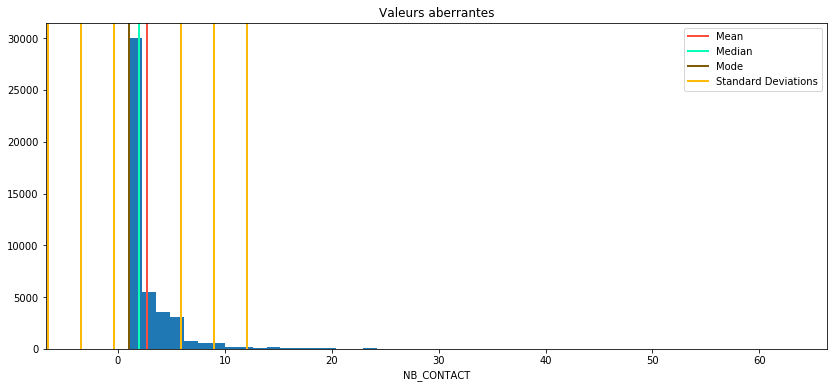

In [108]:
# Trop de valeurs en 1, utilisation du log inutile
hist_quanti_with_restriction(df_data,"NB_CONTACT","-1",">",len(df_data["NB_CONTACT"].value_counts()))

In [4]:
sorted(df_data.NB_DAY_LAST_CONTACT,reverse=True)

[854,
 850,
 842,
 838,
 831,
 828,
 826,
 808,
 805,
 804,
 792,
 792,
 791,
 784,
 782,
 779,
 779,
 778,
 776,
 775,
 774,
 772,
 771,
 769,
 761,
 760,
 756,
 749,
 745,
 728,
 717,
 701,
 690,
 687,
 687,
 686,
 683,
 680,
 674,
 670,
 667,
 656,
 655,
 651,
 651,
 648,
 633,
 626,
 616,
 616,
 603,
 595,
 594,
 592,
 589,
 587,
 586,
 585,
 579,
 578,
 562,
 561,
 561,
 558,
 557,
 557,
 555,
 555,
 555,
 553,
 551,
 547,
 544,
 542,
 541,
 536,
 535,
 535,
 532,
 531,
 529,
 528,
 526,
 524,
 524,
 521,
 521,
 521,
 521,
 520,
 518,
 518,
 515,
 515,
 514,
 511,
 508,
 504,
 504,
 503,
 503,
 500,
 495,
 493,
 492,
 491,
 491,
 490,
 490,
 490,
 489,
 486,
 485,
 484,
 481,
 480,
 479,
 479,
 478,
 478,
 478,
 478,
 477,
 476,
 475,
 474,
 474,
 472,
 470,
 469,
 469,
 467,
 466,
 465,
 464,
 463,
 463,
 463,
 463,
 462,
 462,
 462,
 462,
 461,
 461,
 461,
 461,
 461,
 461,
 460,
 460,
 459,
 459,
 459,
 458,
 458,
 457,
 457,
 457,
 456,
 455,
 455,
 455,
 454,
 452,
 450,
 450

In [8]:
sorted(df_data.NB_CONTACT,reverse=True)

[63,
 58,
 55,
 51,
 50,
 50,
 46,
 44,
 43,
 43,
 43,
 41,
 41,
 39,
 38,
 38,
 38,
 37,
 37,
 36,
 36,
 36,
 36,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,


In [ ]:
treat_NB_DAY_LAST_CONTACT(df)

In [ ]:
d = df_data.query('NB_CONTACT_LAST_CAMPAIGN < 100')
hist_quanti_with_restriction(d,"NB_CONTACT_LAST_CAMPAIGN","0",">",len(df_data["NB_CONTACT_LAST_CAMPAIGN"].value_counts()))

In [5]:
sorted(df_data.BALANCE, reverse=True)

[102127,
 98417,
 81204,
 81204,
 71188,
 66721,
 66653,
 64343,
 59649,
 58932,
 58544,
 57435,
 56831,
 52587,
 52587,
 52527,
 52499,
 51439,
 45789,
 45248,
 45141,
 44134,
 44128,
 43074,
 42045,
 41923,
 41630,
 41242,
 39385,
 39098,
 38279,
 37378,
 37378,
 37176,
 37127,
 36935,
 36686,
 36252,
 36221,
 35589,
 35368,
 34646,
 34247,
 34230,
 32948,
 32948,
 32685,
 32464,
 31868,
 31630,
 31630,
 31472,
 29941,
 29887,
 29484,
 29397,
 29340,
 29312,
 29230,
 29207,
 29184,
 29125,
 29080,
 29050,
 28433,
 28318,
 27733,
 27696,
 27696,
 27696,
 27696,
 27696,
 27624,
 27446,
 27359,
 27069,
 26965,
 26831,
 26765,
 26721,
 26575,
 26575,
 26452,
 26394,
 26306,
 26306,
 26306,
 26254,
 26254,
 26233,
 26172,
 25947,
 25856,
 25824,
 25741,
 25290,
 25204,
 24870,
 24780,
 24598,
 24598,
 24556,
 24498,
 24450,
 24312,
 24299,
 24277,
 24055,
 24025,
 23919,
 23917,
 23878,
 23878,
 23876,
 23867,
 23663,
 23663,
 23592,
 23552,
 23495,
 23494,
 23421,
 23189,
 23076,
 23047,

Mean: 224.85759570836382
Median: 195.0
Mode: 182
Std dev: 114.84132033103451


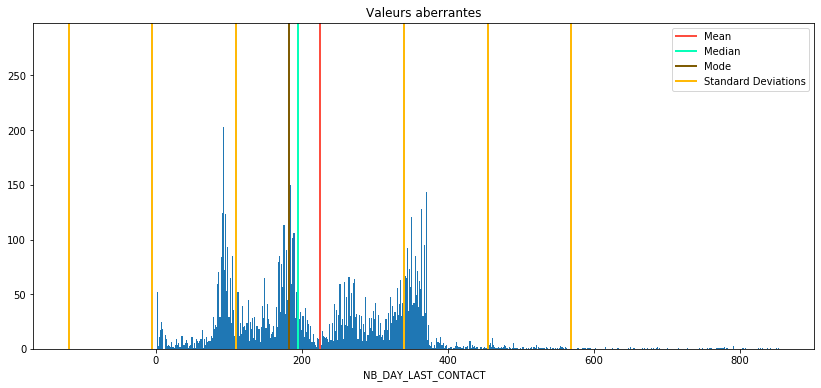

In [155]:
# Valeurs bien éparpillée 56 valeurs au-dessus du seuil 3*std_dev
# imputation median/mode/partie entière de la moyenne (entier garder cohérence dans la donnée)
hist_quanti_with_restriction(df_data,"NB_DAY_LAST_CONTACT","-1",">",len(df_data["NB_DAY_LAST_CONTACT"].value_counts()))

In [109]:
x_1 = df_data.query('NB_DAY_LAST_CONTACT > -1')
xmax = max(x_1["NB_DAY_LAST_CONTACT"])
xmin = min(x_1["NB_DAY_LAST_CONTACT"])
test1 = x_1["NB_DAY_LAST_CONTACT"].apply(lambda x: (x - xmin)/(xmax - xmin))

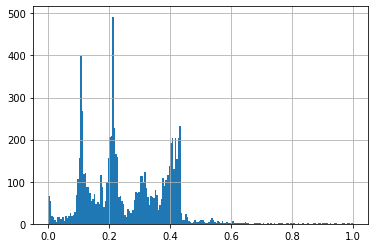

In [110]:
test1.hist(bins=200)

In [123]:
test1.describe()

count    8202.000000
mean        0.262436
std         0.134640
min         0.000000
25%         0.155041
50%         0.227433
75%         0.382181
max         1.000000
Name: NB_DAY_LAST_CONTACT, dtype: float64

In [119]:
x_1 = df_data.query('NB_DAY_LAST_CONTACT > -1')
xq1 = x_1["NB_DAY_LAST_CONTACT"].describe()[4]
xq3 = x_1["NB_DAY_LAST_CONTACT"].describe()[6]
test2 = x_1["NB_DAY_LAST_CONTACT"].apply(lambda x: (x - xq1)/(xq3 - xq1) )

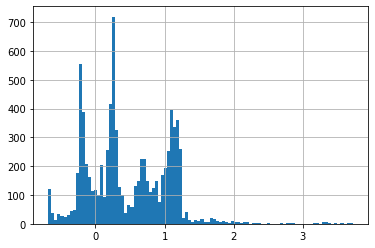

In [120]:
test2.hist(bins=100)

In [121]:
test2.describe()

count    8202.000000
mean        0.472813
std         0.592766
min        -0.682581
25%         0.000000
50%         0.318710
75%         1.000000
max         3.720000
Name: NB_DAY_LAST_CONTACT, dtype: float64

In [124]:
x_1 = df_data.query('NB_DAY_LAST_CONTACT > -1')
xmean = x_1["NB_DAY_LAST_CONTACT"].mean()
xstd = x_1["NB_DAY_LAST_CONTACT"].std()
test3 = x_1["NB_DAY_LAST_CONTACT"].apply(lambda x: (x - xmean)/ xstd)

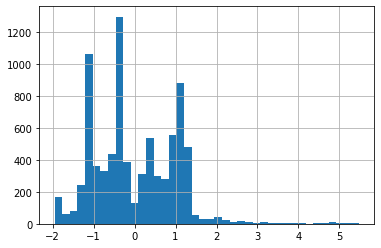

In [126]:
test3.hist(bins=40)

(3757, 1)


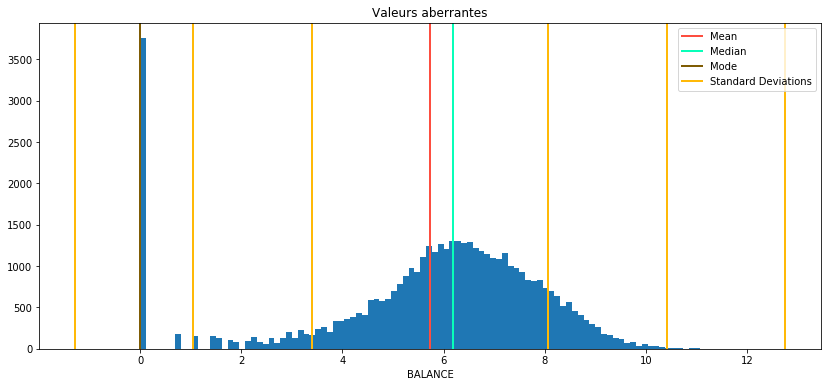

In [153]:
# Après traitement, abs & log, forte quantités de valeurs vers 0, ressemble plus à une loi normal
df_data = treat_BALANCE(df_data)
print(df_data.query('BALANCE == 0').filter(['BALANCE']).shape)
hist_quanti_with_restriction(df_data,"BALANCE","-1",">",100)

In [28]:
df_data.head()

,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION
0,2008-05-05,58,7,2,2,0,2143,1,0,1,261,1,-1,0,2,0
1,2008-05-05,123,10,2,1,0,29,1,0,1,151,1,-1,0,2,0
2,2008-05-05,33,4,2,1,0,2,1,1,1,76,1,-1,0,2,0
3,2008-05-05,47,2,2,1,0,1506,1,0,1,92,1,-1,0,2,0
4,2008-05-05,33,2,0,1,0,1,0,0,1,198,1,-1,0,2,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014C47DE3048>]],
      dtype=object)

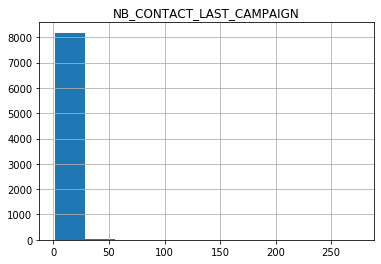

In [6]:
df_data.query('NB_CONTACT_LAST_CAMPAIGN > 0').hist("NB_CONTACT_LAST_CAMPAIGN")

In [7]:
sorted(df_data.NB_CONTACT_LAST_CAMPAIGN,reverse=True)

[275,
 58,
 55,
 51,
 41,
 40,
 38,
 38,
 37,
 37,
 35,
 32,
 30,
 30,
 30,
 29,
 29,
 29,
 29,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,

In [11]:
df_data.NB_CONTACT_LAST_CAMPAIGN.value_counts()

0      36934
1       2767
2       2097
3       1133
4        708
5        451
6        272
7        202
8        126
9         92
10        66
11        64
12        42
13        36
15        20
14        19
17        15
16        12
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: NB_CONTACT_LAST_CAMPAIGN, dtype: int64

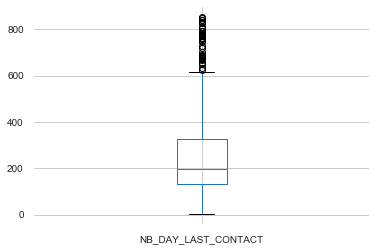

In [46]:
df_data.query('NB_DAY_LAST_CONTACT > 0').boxplot("NB_DAY_LAST_CONTACT")

In [50]:
df_data.query('NB_DAY_LAST_CONTACT > 0').filter(['NB_DAY_LAST_CONTACT']).describe()

,NB_DAY_LAST_CONTACT
count,8202.000000
mean,224.857596
std,114.848322
min,1.000000
25%,133.250000
50%,195.000000
75%,327.000000
max,854.000000


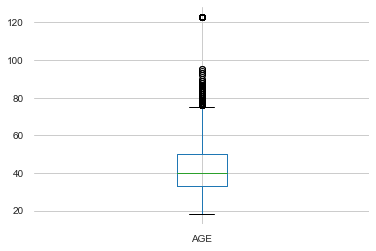

In [51]:
df_data.boxplot("AGE")

In [65]:
x1 = 'NB_DAY_LAST_CONTACT > 0'
x2 = 'AGE < 123'

In [66]:
# Retirer variables
index_col_to_treat = df_data.query(x2).index
df = df_data.query(x2)
print(df[np.abs(df.NB_DAY_LAST_CONTACT-df.NB_DAY_LAST_CONTACT.mean())<=(3*df.NB_DAY_LAST_CONTACT.std())].shape)
print(df[~(np.abs(df.NB_DAY_LAST_CONTACT-df.NB_DAY_LAST_CONTACT.mean())>(3*df.NB_DAY_LAST_CONTACT.std()))].shape)

(41677, 16)
(41677, 16)


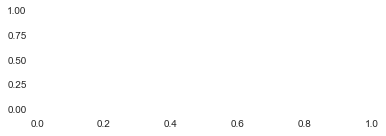

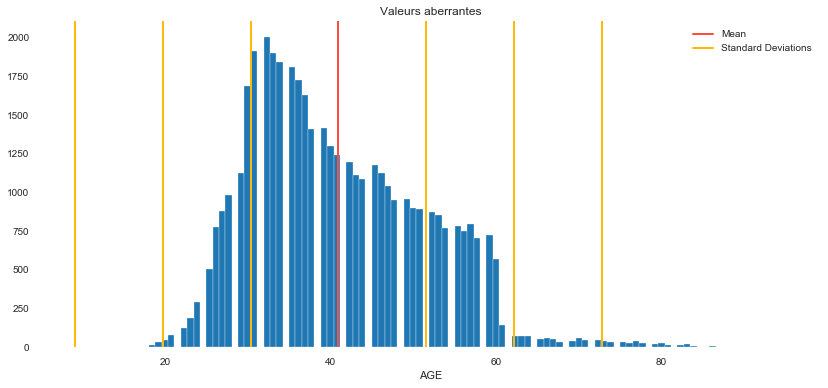

In [136]:
hist_quanti_with_restriction(df_data,"AGE","123","<")

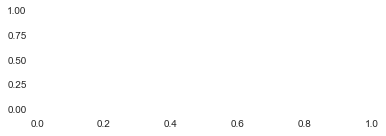

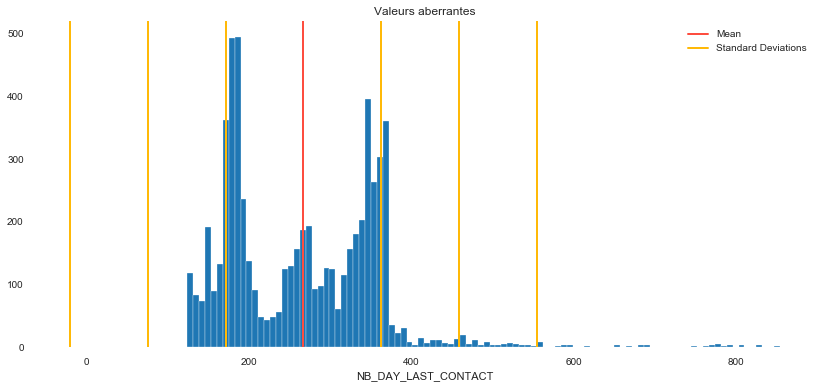

In [137]:
hist_quanti_with_restriction(df_data,"NB_DAY_LAST_CONTACT","0",">")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020883F86288>]],
      dtype=object)

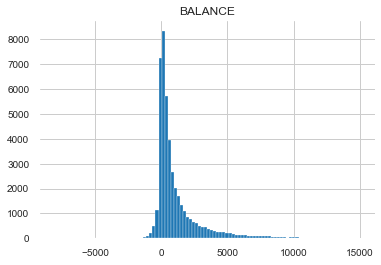

In [138]:
df_data.query('BALANCE < 15000').filter(["BALANCE"]).hist(bins=100)

In [142]:
df_data["BALANCE"].describe()

count     45136.000000
mean       1362.182847
std        3046.691765
min       -8019.000000
25%          72.000000
50%         447.500000
75%        1425.000000
max      102127.000000
Name: BALANCE, dtype: float64

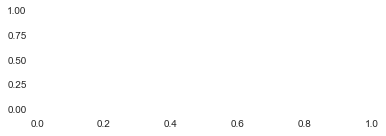

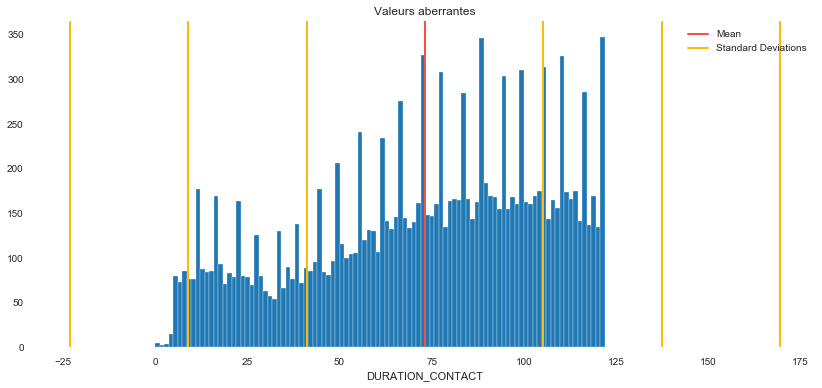

In [141]:
hist_quanti_with_restriction(df_data,"DURATION_CONTACT","2000","<")

In [ ]:
df=pd.DataFrame({'Data':np.random.normal(size=200)})  #example dataset of normally distributed data. 
df[np.abs(df.Data-df.Data.mean())<=(3*df.Data.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df[~(np.abs(df.Data-df.Data.mean())>(3*df.Data.std()))] #or if you prefer the other way around

In [ ]:
df = pd.DataFrame(np.random.randn(100, 3), columns=list('ABC'))

df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

## Partie plus clean

In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import pylab
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
from sklearn import metrics

In [ ]:
df_data = pd.read_csv("data.csv")
print(df_data.shape)
df_data.head(5)

In [4]:
df_data.dtypes

DATE                        object
AGE                          int64
JOB_TYPE                    object
STATUS                      object
EDUCATION                   object
HAS_DEFAULT                 object
BALANCE                      int64
HAS_HOUSING_LOAN            object
HAS_PERSO_LOAN              object
CONTACT                     object
DURATION_CONTACT             int64
NB_CONTACT                   int64
NB_DAY_LAST_CONTACT          int64
NB_CONTACT_LAST_CAMPAIGN     int64
RESULT_LAST_CAMPAIGN        object
SUBSCRIPTION                object
dtype: object

In [147]:
def check_percentage_NaN(name_data):
        return round(name_data.isnull().sum()/name_data.shape[0]*100,2)

In [148]:
check_percentage_NaN(df_data)

DATE                         0.00
AGE                          0.00
JOB_TYPE                     0.63
STATUS                       2.50
EDUCATION                    4.11
HAS_DEFAULT                  0.00
BALANCE                      0.00
HAS_HOUSING_LOAN             0.00
HAS_PERSO_LOAN               3.00
CONTACT                     28.84
DURATION_CONTACT             0.00
NB_CONTACT                   0.00
NB_DAY_LAST_CONTACT          0.00
NB_CONTACT_LAST_CAMPAIGN     0.00
RESULT_LAST_CAMPAIGN        81.84
SUBSCRIPTION                 0.00
dtype: float64

In [149]:
df_data["RESULT_LAST_CAMPAIGN"] = df_data["RESULT_LAST_CAMPAIGN"].replace(np.NaN,"Not contacted")

In [150]:
df_data["CONTACT"] = df_data["CONTACT"].replace(np.NaN,"No")

In [151]:
check_percentage_NaN(df_data)

DATE                        0.00
AGE                         0.00
JOB_TYPE                    0.63
STATUS                      2.50
EDUCATION                   4.11
HAS_DEFAULT                 0.00
BALANCE                     0.00
HAS_HOUSING_LOAN            0.00
HAS_PERSO_LOAN              3.00
CONTACT                     0.00
DURATION_CONTACT            0.00
NB_CONTACT                  0.00
NB_DAY_LAST_CONTACT         0.00
NB_CONTACT_LAST_CAMPAIGN    0.00
RESULT_LAST_CAMPAIGN        0.00
SUBSCRIPTION                0.00
dtype: float64

In [152]:
def NaN_to_mode_quali(name_data,name_column):
    distinct_value = name_data[name_column].value_counts()
    NaN_replace = distinct_value[distinct_value == max(distinct_value)].index[0]
    return name_data[name_column].fillna(NaN_replace)

In [153]:
quali_to_treat = ["JOB_TYPE","STATUS","EDUCATION","HAS_PERSO_LOAN"]
for col in quali_to_treat:
    df_data[col] = NaN_to_mode_quali(df_data, col)

In [154]:
check_percentage_NaN(df_data)

DATE                        0.0
AGE                         0.0
JOB_TYPE                    0.0
STATUS                      0.0
EDUCATION                   0.0
HAS_DEFAULT                 0.0
BALANCE                     0.0
HAS_HOUSING_LOAN            0.0
HAS_PERSO_LOAN              0.0
CONTACT                     0.0
DURATION_CONTACT            0.0
NB_CONTACT                  0.0
NB_DAY_LAST_CONTACT         0.0
NB_CONTACT_LAST_CAMPAIGN    0.0
RESULT_LAST_CAMPAIGN        0.0
SUBSCRIPTION                0.0
dtype: float64

In [155]:
def label_encodage_column(name_data,name_column):
    le = LabelEncoder()
    le.fit(name_data[name_column])
    return list(le.transform(name_data[name_column]))

In [156]:
column_to_treat = ["JOB_TYPE","STATUS","EDUCATION","HAS_DEFAULT","HAS_HOUSING_LOAN","HAS_PERSO_LOAN","HAS_PERSO_LOAN","CONTACT","RESULT_LAST_CAMPAIGN","SUBSCRIPTION"]
for col in column_to_treat:
    df_data[col] = label_encodage_column(df_data, col)

## Modèle simple

In [157]:
y = df_data["SUBSCRIPTION"]
X = df_data.drop(["SUBSCRIPTION","DATE"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [158]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logit = logreg.predict(X_test)

D:\PYTHON_LOG\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8977918912931098


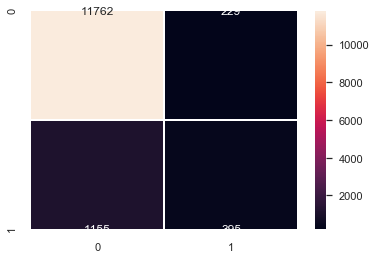

In [159]:
mc = metrics.confusion_matrix(y_test,y_pred_logit)
acc = metrics.accuracy_score(y_test, y_pred_logit)
print(acc)
sns.set()
sns.heatmap(mc, linewidths=.5, annot=True, fmt="d")

## Traitement 

In [5]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import pylab
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
from sklearn import metrics

In [6]:
df = pd.read_csv("data.csv")
print(df.shape)
df.head(5)

(45136, 16)


,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION
0,2008-05-05,58,Manager,Marié,Tertiaire,No,2143,Yes,No,NaN,261,1,-1,0,NaN,No
1,2008-05-05,123,Technicien,NaN,Secondaire,No,29,Yes,NaN,NaN,151,1,-1,0,NaN,No
2,2008-05-05,33,Entrepreuneur,Marié,Secondaire,No,2,Yes,Yes,NaN,76,1,-1,0,NaN,No
3,2008-05-05,47,Col bleu,Marié,NaN,No,1506,Yes,No,NaN,92,1,-1,0,NaN,No
4,2008-05-05,33,NaN,Célibataire,NaN,No,1,No,No,NaN,198,1,-1,0,NaN,No


In [7]:
x = df.query('NB_DAY_LAST_CONTACT == -1')
x['RESULT_LAST_CAMPAIGN'] = x['RESULT_LAST_CAMPAIGN'].fillna("Not contacted")
x.head(20)
INDEX = list(x.index)
df.loc[INDEX]['RESULT_LAST_CAMPAIGN'] = x
df.head(30)

NameError: name 'X' is not defined